<a href="https://colab.research.google.com/github/Najlalala007/Machine-Learning/blob/main/ML_Task6(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree

In [22]:
# Muat dataset
wine = load_wine()

# Konversi dataset ke dalam DataFrame pandas
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Inisialisasi dan latih model pohon keputusan
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Akurasi: 0.9444444444444444

Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



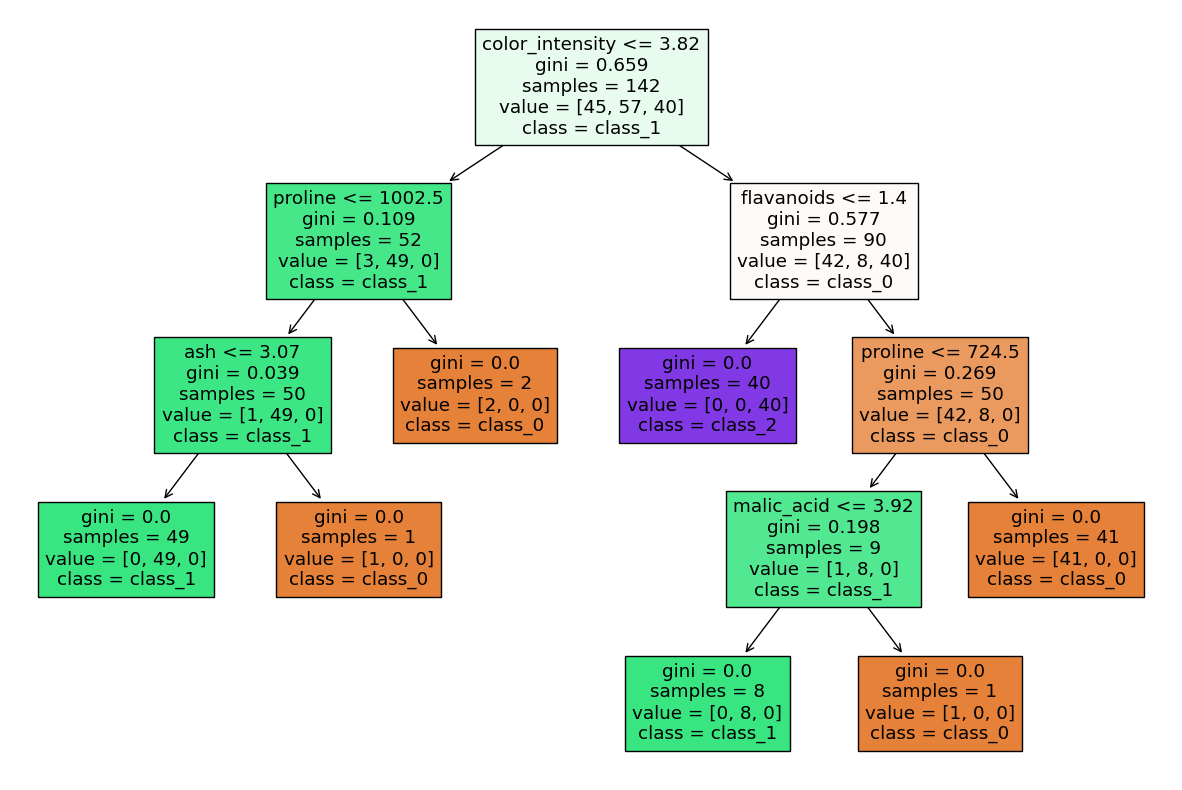

In [35]:
# Prediksi kelas untuk data uji
y_pred = clf.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()


Precision: 0.9513888888888888
Recall: 0.9444444444444444
F1 Score: 0.9448559670781894


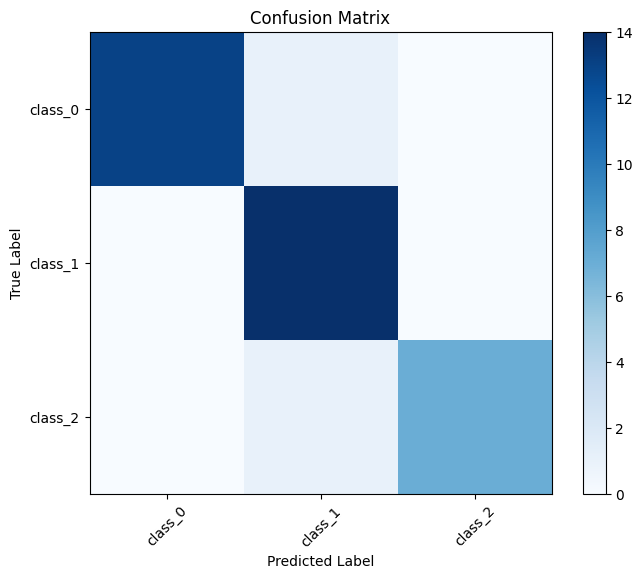

AxisError: axis 1 is out of bounds for array of dimension 1

Precision: 0.9513888888888888
Recall: 0.9444444444444444
F1 Score: 0.9448559670781894


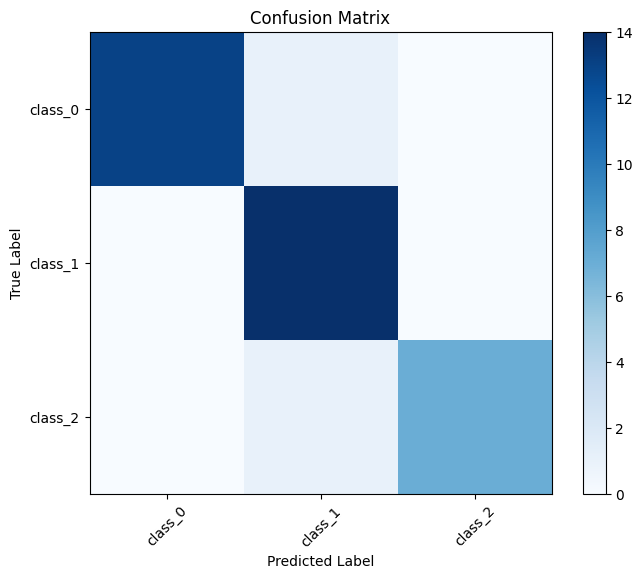

AxisError: axis 1 is out of bounds for array of dimension 1

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(wine.target_names))
plt.xticks(tick_marks, wine.target_names, rotation=45)
plt.yticks(tick_marks, wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
y_proba = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(wine.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test, y_proba[:, i], multi_class='ovr')

plt.figure(figsize=(10, 8))
for i in range(len(wine.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}, area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
